In [1]:
import pandas as pd
from ast import literal_eval

In [2]:
data = pd.read_csv(r"data\models\v19\loss.csv")

import matplotlib.pyplot as plt

plt.plot(data['train_loss'])
plt.plot(data['valid_loss'])

In [13]:
literal_eval(data.raman_true[0])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

In [19]:
print(data.raman_true[100])

[0. 0. 0. ... 0. 0. 0.]


In [36]:
import pandas as pd

df = pd.read_pickle(r'C:\Users\Aless\OneDrive\Documenti\molecules\data\raw\train.pickle')

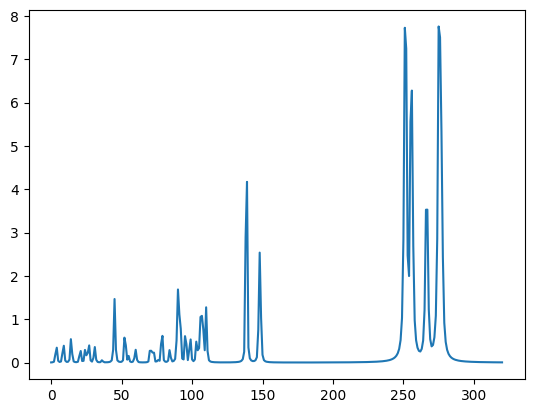

In [69]:
import matplotlib.pyplot as plt

plt.plot(df.RAMAN_SPECTRUM_POOLED[300])

In [59]:
df.RAMAN_SPECTRUM[0][-10:]

array([0.01567146, 0.01554627, 0.01542259, 0.01530039, 0.01517965,
       0.01506035, 0.01494246, 0.01482596, 0.01471084, 0.01454067])

In [62]:
df['WAVELENGTH'][0][-10:]

array([3481., 3483., 3485., 3487., 3489., 3491., 3493., 3495., 3497.,
       3500.])

In [31]:
df['<lambda>'].describe()

count    8079.000000
mean        0.840816
std         0.109023
min         0.000000
25%         0.840412
50%         0.861742
75%         0.882140
max         0.993168
Name: <lambda>, dtype: float64

<Axes: >

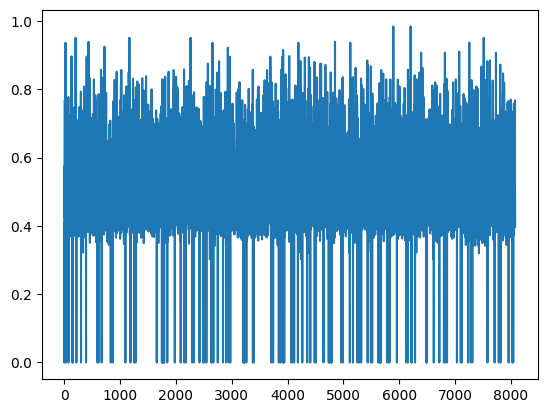

In [29]:
df.BalabanJ.plot()

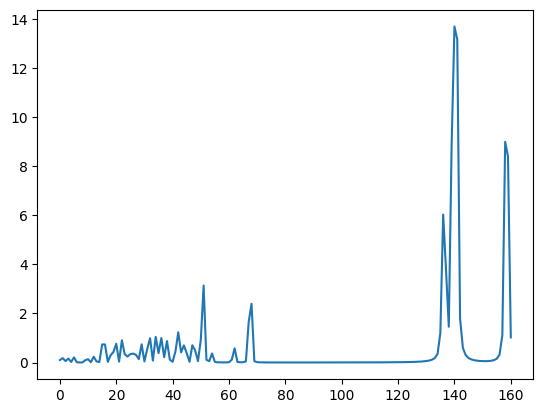

In [19]:
wave = df['WAVELENGTH'][0]
value = df['RAMAN_SPECTRUM'][0]

interval = 20
max_values = []

interval = 20
max_values = []

current_wave = 300
while current_wave <= 3500:
    values_in_interval = [val for w, val in zip(wave, value) if current_wave <= w < current_wave + interval]
    if values_in_interval:
        max_value_in_interval = max(values_in_interval)
        max_values.append(max_value_in_interval)
    else:
        max_values.append(None)  # or some default value if no values are found in the interval
    current_wave += interval

import matplotlib.pyplot as plt

plt.plot(max_values)

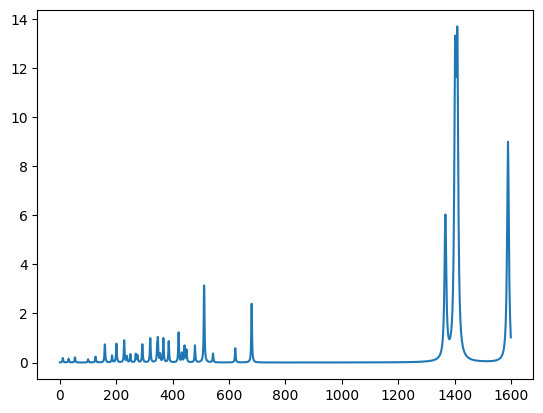

In [20]:
import matplotlib.pyplot as plt

plt.plot(df['RAMAN_SPECTRUM'].values[0])

In [18]:
len(max_values)

161

In [9]:
for wave, spectre in zip(df['WAVELENGTH'], df['RAMAN_SPECTRUM']):
    

0       [0.0052112106577730955, 0.006097605771729217, ...
1       [0.0010947573689526551, 0.001115079092536628, ...
2       [0.0031548457170330244, 0.00347685683833174, 0...
3       [0.0024781177179273167, 0.0026911254826811307,...
4       [0.010259208333772595, 0.010991861419120416, 0...
                              ...                        
8074    [0.007776289624417309, 0.009425270098958119, 0...
8075    [0.00786124591910159, 0.009975696556910713, 0....
8076    [0.0013317387919265166, 0.0013623277551795296,...
8077    [0.08126622200033921, 0.15455679101474856, 0.2...
8078    [0.0016725726844341274, 0.0017249851205353207,...
Name: RAMAN_SPECTRUM, Length: 8079, dtype: object

In [29]:
df.loc[0, :][[col for col in df.columns if col not in ['SMILE', 'WAVELENGTH', 'RAMAN_SPECTRUM']]].values.shape

(11,)

In [15]:
import numpy as np

array = np.array(df.RAMAN_SPECTRUM.to_list())

In [18]:
point_df = pd.DataFrame({f"point_{i}": array[:, i] for i in range(array.shape[1])})

In [21]:
point_df.point_1.describe()

count    32315.000000
mean         0.024371
std          0.065571
min          0.000093
25%          0.001768
50%          0.003582
75%          0.013274
max          1.908742
Name: point_1, dtype: float64

In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors

Descriptors.ExactMolWt(Chem.MolFromSmiles('O[C@H]1[C@@H](CC#N)NC1=O'))

126.042927432

In [6]:
from rdkit.Chem import GraphDescriptors

GraphDescriptors.BertzCT(Chem.MolFromSmiles('O[C@H]1[C@@H](CC#N)NC1=O'))

172.28703332971156

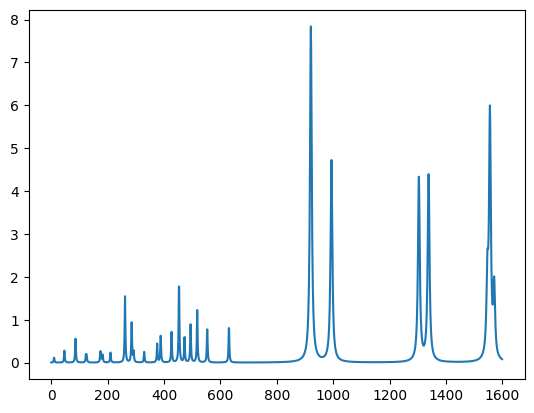

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['RAMAN_SPECTRUM'].values[10])

In [8]:
(
                df
                .assign(smile_len=lambda x: x.SMILE.apply(len))
                .query("smile_len > 1")
                .drop("smile_len", axis=1)
                )

,SMILE,WAVELENGTH,RAMAN_SPECTRUM
0,CCOC[C@H]1[C@H]2C[N@@]1C2,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.006032569495532204, 0.008787502263331682, 0..."
1,C[C@H]1C[C@H]2[C@@H](C#C)[C@@H]12,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.0017761694196125244, 0.0018325559595914673,..."
2,COC1=[N]=CO[C]1C#C,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.009024115861626556, 0.013324170925158243, 0..."
3,CC1(C)[C@@H](CC1=O)C=O,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.001509607394547985, 0.0015572711448002274, ..."
4,C[C@@]1(O)COC(=O)C=C1,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.003390927919805864, 0.0038613359136752227, ..."
...,...,...,...
32310,CC[C@H]1[C@H]2N(C)C[C@@]12O,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.029356989292644898, 0.04611560157911501, 0...."
32311,CC1=CC(=O)OC1,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.0007946947608277736, 0.0008020039823253914,..."
32312,CCN(C=O)[C@@H](C)C#N,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.002015025678842824, 0.0021729642537883682, ..."
32313,CC#C[C@@]1(C)OC[C@H]1O,"[300.0, 302.0, 304.0, 306.0, 308.0, 310.0, 312...","[0.021848568949973432, 0.029608797270023936, 0..."


In [3]:
import torch
import torch.nn as nn

class PeakAwareLoss(nn.Module):
    def __init__(self, threshold=0.5, w_peak=1.0):
        super(PeakAwareLoss, self).__init__()
        self.threshold = threshold
        self.w_peak = w_peak
    
    def forward(self, y_true, y_pred):
        mse_loss = nn.MSELoss()(y_pred, y_true)
        
        peaks = torch.where(y_true > self.threshold)
        
        if peaks[0].shape[0] == 0:
            return mse_loss
        
        peak_loss = mse_loss  # Initialize with MSE loss
        for peak in peaks[0]:
            peak_loss += self.w_peak * torch.square(y_true[peak] - y_pred[peak])
        
        return peak_loss

# Example usage
y_true = torch.tensor([0.2, 0.6, 0.8, 0.3, 3])
y_pred = torch.tensor([1.5, 0.5, 0.9, 0.25, 5])

loss_fn = PeakAwareLoss(threshold=0.5, w_peak=1.0)
loss = loss_fn(y_true, y_pred)
print("Peak-Aware Loss:", loss.item())


Peak-Aware Loss: 5.162499904632568


In [ ]:
y_true = torch.tensor([0.2, 0.6, 0.8, 0.3, 3])
y_pred = torch.tensor([0.3, 0.5, 2.1, 0.25, 3])

loss_fn = PeakAwareLoss(threshold=0.5, w_peak=1.0)
loss = loss_fn(y_true, y_pred)
print("Peak-Aware Loss:", loss.item())